# Gradient descent HW1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Closest point projection function and visualization for the simple domains

In [ ]:
# Closest point projection for PGD
def closes_point_projection(x,y, domain):
    if domain == "circle":
        # If outisde the circle
        if x**2 + y**2 > 1.5:
            scaling =np.sqrt(1.5)/ np.sqrt(x**2 + y**2)
            return x * scaling, y * scaling
        # if inside leave
        #print("here")
        return x,y
    if domain == "square":
        # vertices 
        if np.abs(y) > 1 and np.abs(x) > 1:
            return x/np.abs(x), y/np.abs(y)
        # edges
        if np.abs(y) > 1 and np.abs(x) < 1:
            return x,y/np.abs(y)
        if np.abs(x) > 1 and np.abs(y) < 1:
            return x/np.abs(x),y
        return x,y
    if domain == "triangle":
        if x < -1 and y > -1 and y < 1.5:
            return -1,y
        if x < -1 and y < -1:
            return -1,-1
        if x > -1 and x < 1.5 and y < -1:
            return x,-1
        if x > 1.5 and y < x - 2.5:
            return 1.5, -1
        if y > -x + 0.5 and y > x - 2.5 and y < x + 2.5:
            t = (0.5 - x + y)/(np.sqrt(2 * (x-0.5)**2 + y**2))
            return 0.5 + -t, t
        if y > 1.5 and y > 2.5 + x:
            return -1,1.5
        return x,y 


 

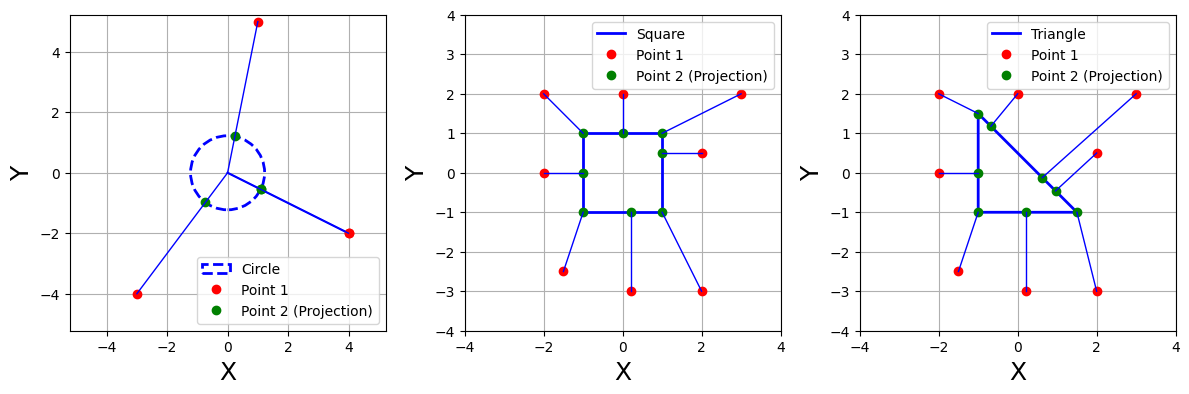

In [84]:
point1 = (4, -2)
point2 = closes_point_projection(point1[0], point1[1], "circle") 
radius = np.sqrt(1.5)

points = [
   (1,5), (-3,-4), (4,-2)
]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Circle plot
circle = plt.Circle((0, 0), radius, color='blue', fill=False, linestyle='--', linewidth=2)
axs[0].add_artist(circle)
axs[0].plot(point1[0], point1[1], 'ro', label="Point 1")
axs[0].plot(point2[0], point2[1], 'go', label="Point 2")
axs[0].plot([0, point1[0]], [0, point1[1]], 'b-', label="Line from (0,0) to Point 2")

for point in points:
    point2 = closes_point_projection(point[0], point[1], "circle")
    axs[0].plot(point[0], point[1], 'ro')
    axs[0].plot(point2[0], point2[1], 'go')
    axs[0].plot([0, point[0]], [0, point[1]], 'b-', linewidth=1)

axs[0].set_xlim(-radius-4, radius+4)
axs[0].set_ylim(-radius-4, radius+4)
axs[0].set_aspect('equal', 'box')
axs[0].set_xlabel('X', fontsize=18)
axs[0].set_ylabel('Y', fontsize=18)
axs[0].legend(['Circle', 'Point 1', 'Point 2 (Projection)'])
axs[0].grid(True)

# Square plot
points1 = [(3, 2), (2, 0.5), (2, -3), (0.2, -3), (-1.5, -2.5), (-2, 0), (-2, 2), (0, 2)]
square_x = [-1, 1, 1, -1, -1]
square_y = [-1, -1, 1, 1, -1]
axs[1].plot(square_x, square_y, 'b-', label="Square [-1, 1] x [-1, 1]", linewidth=2)
for point1 in points1:
    point2 = closes_point_projection(point1[0], point1[1], "square")
    axs[1].plot(point1[0], point1[1], 'ro')
    axs[1].plot(point2[0], point2[1], 'go')
    axs[1].plot([point1[0], point2[0]], [point1[1], point2[1]], 'b-', linewidth=1)
axs[1].set_xlim(-4, 4)
axs[1].set_ylim(-4, 4)
axs[1].set_aspect('equal', 'box')
axs[1].set_xlabel('X', fontsize=18)
axs[1].set_ylabel('Y', fontsize=18)

axs[1].legend(['Square', 'Point 1', 'Point 2 (Projection)'])
axs[1].grid(True)

# Triangle plot
triangle_vertices = [(-1, -1), (1.5, -1), (-1, 1.5)]
triangle_x = [-1, 1.5, -1, -1]
triangle_y = [-1, -1, 1.5, -1]
axs[2].plot(triangle_x, triangle_y, 'b-', label="Triangle", linewidth=2)
for point1 in points1:
    axs[2].plot(point1[0], point1[1], 'ro')
    point2 = closes_point_projection(point1[0], point1[1], "triangle")
    axs[2].plot(point2[0], point2[1], 'go')
    axs[2].plot([point2[0], point1[0]], [point2[1], point1[1]], 'b-', linewidth=1)
axs[2].set_xlim(-4, 4)
axs[2].set_ylim(-4, 4)
axs[2].set_aspect('equal', 'box')
axs[2].set_xlabel('X', fontsize=18)
axs[2].set_ylabel('Y', fontsize=18)
axs[2].legend(['Triangle', 'Point 1', 'Point 2 (Projection)'])
axs[2].grid(True)

plt.tight_layout()
plt.savefig("report/figures/projections.png")

## Problem 5

In [32]:
def fun(x,y):
    return x**2 + np.exp(x) + y**2 - x*y

def grad_f(x,y):
    return (2*x + np.exp(x) - y, 2 * y - x)

In [36]:
# Find the approximate x_star
minimum = 5
x_star = (0,0)
for x in np.arange(-2,2, step=0.01):
    for y in np.arange(-2,2, step=0.01):
        curr_val = fun(x,y)
        if curr_val < minimum:
            x_star = x,y
            minimum = curr_val


In [37]:
x_star

(np.float64(-0.4299999999999986), np.float64(-0.21999999999999842))

In [40]:
# Implement PGD
x_1 = np.array([-1,1]).astype(np.int32)
# Theoretically found parameters
L = np.sqrt(72 + 12*np.exp(2) + np.exp(4) )
alpha = (4 + np.exp(-2) - np.sqrt(np.exp(-4) + 4))/2
beta = (4+np.exp(2) + np.sqrt(np.exp(4) + 4))/2
# Set the number of steps (0-9 ... 10 steps)
T = 9 
# Iitialize gammas
gammas = [np.linalg.norm(x_1-x_star)/(L*np.sqrt(T)),
           1/beta, 2/alpha] # The last on has to be adjusted with each step
# array of all x-ss
x_k_all = np.zeros(shape=(3,3,T+1)).tolist()

#kappa for the guarantees
kappa = beta/alpha

for j,domain in enumerate(("circle", "square", "triangle")):
    for i, gamma in enumerate(gammas):
        x_k = x_1
        for k in range(T):

            if i == 2:
                gamma = gamma/(k+2)
            # closest point projection
            x_k =  np.array(closes_point_projection(x_k[0], x_k[1], domain=domain))

            x_k_all[j][i][k] = x_k

            grd = grad_f(x_k[0], x_k[1]) 
            x_k = x_k - (gamma * grd[0], gamma*grd[1])

            if i == 2:
                gamma *= k+2

        x_k_all[j][i][T] =   x_k
        print(x_k)
    print("\n")
         

[-0.47988757  0.35172565]
[-0.34960532 -0.06819384]
[-0.43450303 -0.2189753 ]


[-0.52710995  0.40924016]
[-0.34842568 -0.06018291]
[-0.42630832 -0.20769868]


[-0.52710995  0.40924016]
[-0.34842568 -0.06018291]
[-0.42358281 -0.20394134]




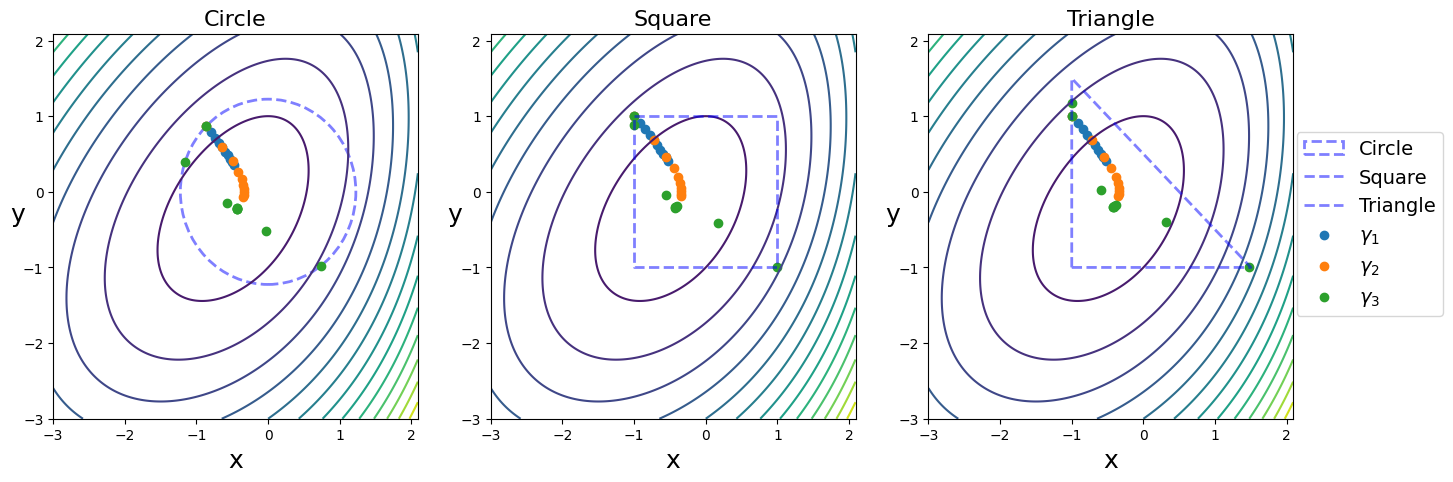

In [95]:
# Plots 
x = np.arange(-3,2.1, 0.01)
y = np.arange(-3,2.1, 0.01)
x,y = np.meshgrid(x,y)
z = fun(x,y)

fig, axes = plt.subplots(1,3, figsize=(16, 5))

for i,( ax,x_k_all_circle, title) in enumerate( zip(axes,x_k_all,("Circle", "Square", "Triangle"))) :
    # Circle 
    #plt.figure()
    ax.contour(x,y,z, levels=15)
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", rotation=0, fontsize=18)
    if i == 0:
        radius = np.sqrt(1.5)
        circle = plt.Circle((0, 0), radius, color='blue', fill=False, label="Circle", linestyle='--', linewidth=2, alpha=0.5)
        ax.add_artist(circle)
    
    elif i == 1:
        square_x = [-1,1,1,-1,-1]
        square_y = [1,1,-1,-1,1]
        ax.plot(square_x, square_y,'b--', label="Square", linewidth=2, alpha=0.5)

    else:
        triangle_x = [-1, 1.5, -1, -1]
        triangle_y = [-1, -1, 1.5, -1]
        ax.plot(triangle_x, triangle_y, 'b--', label="Triangle", linewidth=2, alpha=0.5)

    for j in range(3):
        x_s = [arr[0] for arr in x_k_all_circle[j]]
        y_s = [arr[1] for arr in x_k_all_circle[j]]
        if i == 2:
            ax.scatter(x_s,y_s, label = fr'$\gamma_{j+1}$') 
        else:
            ax.scatter(x_s,y_s)
    ax.set_title(title, fontsize=16)
fig.legend(loc= "center right", bbox_to_anchor = (0.9999,0.5), fontsize=14)
plt.savefig("report/figures/PGD.png")

In [42]:
# Theoretical guarantees, only take the circle here (only the first one, and third one)
x_k_all_circle = x_k_all[0] 
for x_k_all_circle in x_k_all:
    # First one 
    x_k_curr = x_k_all_circle[0]
    x_mean,y_mean = np.mean(x_k_curr, axis=0)

    left_side = fun(x_mean, y_mean)- fun(x_star[0], x_star[1])
    right_side = L * np.linalg.norm(x_1 - x_star) / np.sqrt(T+1)
    print(f"{left_side} <= {right_side}") ### it holds
    # Second one (secon guarantee)
    x_k_curr = x_k_all_circle[1]
    x_1 = x_k_curr[0]
    x_k = x_k_curr[len(x_k_curr)-1]
    left_side = fun(x_k[0], x_k[1]) - fun(x_star[0], x_star[1])
    right_side = (3 * beta * np.linalg.norm(x_1 - x_star)**2 + fun(x_1[0], x_1[1]) - fun(x_star[0], x_star[1]))/k
    print(f"{left_side} <= {right_side}")
    # Second one (third gurantee)
    x_k_curr = x_k_all_circle[1]
    x_in = x_k_curr[len(x_k_curr)-1]
    left_side = fun(x_in[0], x_in[1]) - fun(x_star[0], x_star[1])
    right_side = beta/2 * ((kappa-1)/kappa)**(2*(T)) * np.linalg.norm(x_1 - x_star)**2
    print(f"{left_side} <= {right_side}")
    # Third gamma (fourth guarantee)
    x_k_curr = x_k_all_circle[2]
    input_1x, input_1y = (np.sum([2*(i) * x[0] for i,x in zip(range(1,T+2), x_k_curr)]) / ((T+2)*(T+1)),
                        np.sum([2*(i) * x[1] for i,x in zip(range(1,T+2), x_k_curr)]) / ((T+2)*(T+1)))
 
    left_side = fun(input_1x, input_1y) - fun(x_star[0], x_star[1])
    right_side = 2 * L**2/(alpha * (T+2))
    print(f"{left_side} <= {right_side}\n")

0.8553988369589384 <= 6.247746238007681
0.018790526731294888 <= 5.125565783010446
0.018790526731294888 <= 0.7704010786350806
6.485179527848661e-05 <= 36.7374955000112

1.1567480136795916 <= 5.429759100894305
0.020642438198600788 <= 6.797174410868563
0.020642438198600788 <= 1.020005519158525
0.004628200450852438 <= 36.7374955000112

1.1567480136795916 <= 6.247746238007681
0.020642438198600788 <= 6.797174410868563
0.020642438198600788 <= 1.020005519158525
0.01011414147772527 <= 36.7374955000112



## Problem 6

In [9]:
# Coefficients from the table
a_ij = np.array([
    [3.0, 10, 30],
    [0.1, 10, 35],
    [3.0, 10, 30],
    [0.1, 10, 35]
])

c_j = np.array([1.0, 1.2, 3.0, 3.2])

p_ij = np.array([
    [0.36890, 0.1170, 0.2673],
    [0.46990, 0.4387, 0.7470],
    [0.10910, 0.8732, 0.5547],
    [0.03815, 0.5743, 0.8828]
])

def function(z):
    total = 0
    for i in range(4):  # Sum over i
        exponent = -np.sum(a_ij[i] * (z - p_ij[i])**2)  # Sum over j
        total += c_j[i] * np.exp(exponent)
    return -total

def gradient(z):
    grad = np.zeros(3)
    for i in range(4):
        exponent = np.exp(-np.sum(a_ij[i] * (z- p_ij[i])**2))
        for j in range(3):
            grad[j] += 2*c_j[i] * a_ij[i,j] * (z[j] - p_ij[i,j]) * exponent

    return grad


In [10]:
# Find the approximate x_star
minimum = 5
x_star = (0,0,0)

for z1 in np.arange(0,1,0.1):
    for z2 in np.arange(0,1,0.1):
        for z3 in np.arange(0,1,0.1):
            curr_val = function((z1,z2,z3))
            if curr_val < minimum:
                x_star = z1,z2,z3
                minimum = curr_val


In [79]:
# Find the approximate x_star
minimum = 5
x_start = (0,0,0)

for z1 in np.arange(0,1,0.1):
    for z2 in np.arange(0,1,0.1):
        for z3 in np.arange(0,1,0.1):
            curr_val = function((z1,z2,z3))
            if curr_val < minimum:
                x_start = z1,z2,z3
                minimum = curr_val

steps = 50000
# Use gradient descent for more precise
for gamma in [1,0.1,0.0102,0.01,0.008,0.005,0.001]:
    print(f"gamma = {gamma}")
    x_k = np.array(x_start, dtype=np.float64)
    for k in range(steps):
        #gamma = gamma/(k+1)
        grd = gradient(x_k)
        if function(x_k) - function((x_k - [gamma * grd[0], gamma*grd[1], gamma*grd[2]])) < 1e-30:
            print(k)
            print(x_k)
            print(function(x_k))
            break
        x_k = x_k - [gamma * grd[0], gamma*grd[1], gamma*grd[2]]



gamma = 1
0
[0.1 0.6 0.9]
-3.586922560937449
gamma = 0.1
0
[0.1 0.6 0.9]
-3.586922560937449
gamma = 0.0102
907
[0.11461415 0.55564885 0.85254695]
-3.8627821478207345
gamma = 0.01
918
[0.11461413 0.55564885 0.85254695]
-3.86278214782073
gamma = 0.008
1133
[0.1146141  0.55564885 0.85254695]
-3.8627821478207203
gamma = 0.005
1759
[0.114614   0.55564885 0.85254695]
-3.8627821478206847
gamma = 0.001
8128
[0.11461355 0.55564885 0.85254696]
-3.862782147820381
